In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Master Stats 2023
Cleaning dataset to retrieve education related information

In [6]:
# "General stats" EDA
df_general_stats = pd.read_excel('shared_data_read_only/Data/AfriKids/InternalData/1. Master Stats 2023.xlsx', sheet_name='General stats')

# Show the first few rows and basic info for an overview
df_general_stats_info = df_general_stats.info()
df_general_stats_head = df_general_stats.head()

df_general_stats_info, df_general_stats_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Use the + or - at the left of the row numbers to open/close the groups  190 non-null    object 
 1   Notes                                                                   77 non-null     object 
 2   Ghana                                                                   134 non-null    object 
 3   UER                                                                     131 non-null    object 
 4   Pre-2018 Northern Region                                                87 non-null     object 
 5   UWR                                                                     122 non-null    object 
 6   NR                                                                      38 non-nul

(None,
   Use the + or - at the left of the row numbers to open/close the groups  \
 0                                            General                       
 1                                         Population                       
 2                                        Population                        
 3                    Percentage of female population                       
 4                      Percentage of male population                       
 
                     Notes     Ghana       UER Pre-2018 Northern Region  \
 0  Demographics, AfriKids       NaN       NaN                      NaN   
 1                     NaN       NaN       NaN                      NaN   
 2                     NaN  30832019   1301226                      NaN   
 3                     NaN  0.506992  0.514871                      NaN   
 4                     NaN  0.493008  0.485129                      NaN   
 
         UWR            NR            NER          Sav.R  \
 0       NaN     

Now we manipulate the dataframe so that the regions are the rows and the type of aggregate information is the column

In [7]:
# Keep only education related rows
df_subset = df_general_stats.iloc[143:186].copy()

# Set the first column as the new index (features)
df_transformed = df_subset.set_index('Use the + or - at the left of the row numbers to open/close the groups')

# Transpose the DataFrame so that the columns from Ghana to Northern regions combined become rows
df_transformed = df_transformed.loc[:, 'Ghana':'Northern regions combined'].T

cols_to_drop = ['Achievement','Access','Pre-Primary','Primary','Secondary']
aggregate_education = df_transformed.drop(columns=cols_to_drop)

# Display the transformed DataFrame
aggregate_education


Use the + or - at the left of the row numbers to open/close the groups,Literacy rate among the male population between 6 - 15yrs,Literacy rate among the female population aged 6-15yrs,% of children living in households that have 3 or more childrens' books,% of children who read books or are read to at home,Median years of education for women (in years),Median years of education for men (in years),Median age of enrolment in school women (amongst women aged 15-24),Median age of enrolment in school men (amongst men aged 15-24),% of females over 6 with no education,% of females completed primary (and this remains their highest level of schooling),...,% of Primary school completion rate boys,Pupil to teacher ratio in primary,% of children over-age by 2 or more years,School age population,JHS completion rate girls,JHS completion rate boys,Pupil to teacher ratio in JHS,% of children over-age by 2 or more years\n(Lower Secondary School),Disabilities,"Pecentage of the female population, above 5 years, who have varying degrees of difficulty in performing activities"
Ghana,NaN,NaN,7.1,64.2,7.8,8.6,6.5,6.5,19.1,5.2,...,99,NaN,16,3706186,66,72,NaN,34.5,NaN,0.088
UER,0.464156,0.504267,2.9,62.6,2.9,5,8.1,6.9,40,7.4,...,107.5,42,22.9,NaN,NaN,NaN,19,47.2,NaN,0.101746
Pre-2018 Northern Region,NaN,NaN,1.1,47,0,3,7.6,7.3,65.8,2.6,...,86.6,38,20.1,NaN,NaN,NaN,21,45.6,NaN,NaN
UWR,0.38774,0.418868,1.9,50.9,1,5.8,8,7.2,48.7,4.6,...,111.6,37,23.5,NaN,NaN,NaN,16,53.1,NaN,0.107106
NR,0.360012,0.359498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07156
NER,0.298172,0.306412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072926
Sav.R,0.25905,0.273802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072255
Northern regions combined,0.353826,0.372569,1.966667,53.5,1.200602,NaN,7.853614,7.133333,51.5,4.866667,...,101.9,39,22.166667,NaN,NaN,NaN,18.666667,48.633333,NaN,NaN


In [15]:
aggregate_education.iloc[:,[0,1]]

Use the + or - at the left of the row numbers to open/close the groups,Literacy rate among the male population between 6 - 15yrs,Literacy rate among the female population aged 6-15yrs
Ghana,NaN,NaN
UER,0.464156,0.504267
Pre-2018 Northern Region,NaN,NaN
UWR,0.38774,0.418868
NR,0.360012,0.359498
NER,0.298172,0.306412
Sav.R,0.25905,0.273802
Northern regions combined,0.353826,0.372569


### Correlations

In [26]:
cols = ['Literacy rate among the male population between 6 - 15yrs',
 'Literacy rate among the female population aged 6-15yrs','% of women aged 15-24 who stopped school to get married',
 '% of women aged 15-24 who stopped school due to unaffordable fees',
 '% of males aged 15-24 who stopped school due to unnaffordable fees',
 '% of Primary school completion rate girls',
 '% of Primary school completion rate boys',
 'Pupil to teacher ratio in primary ']

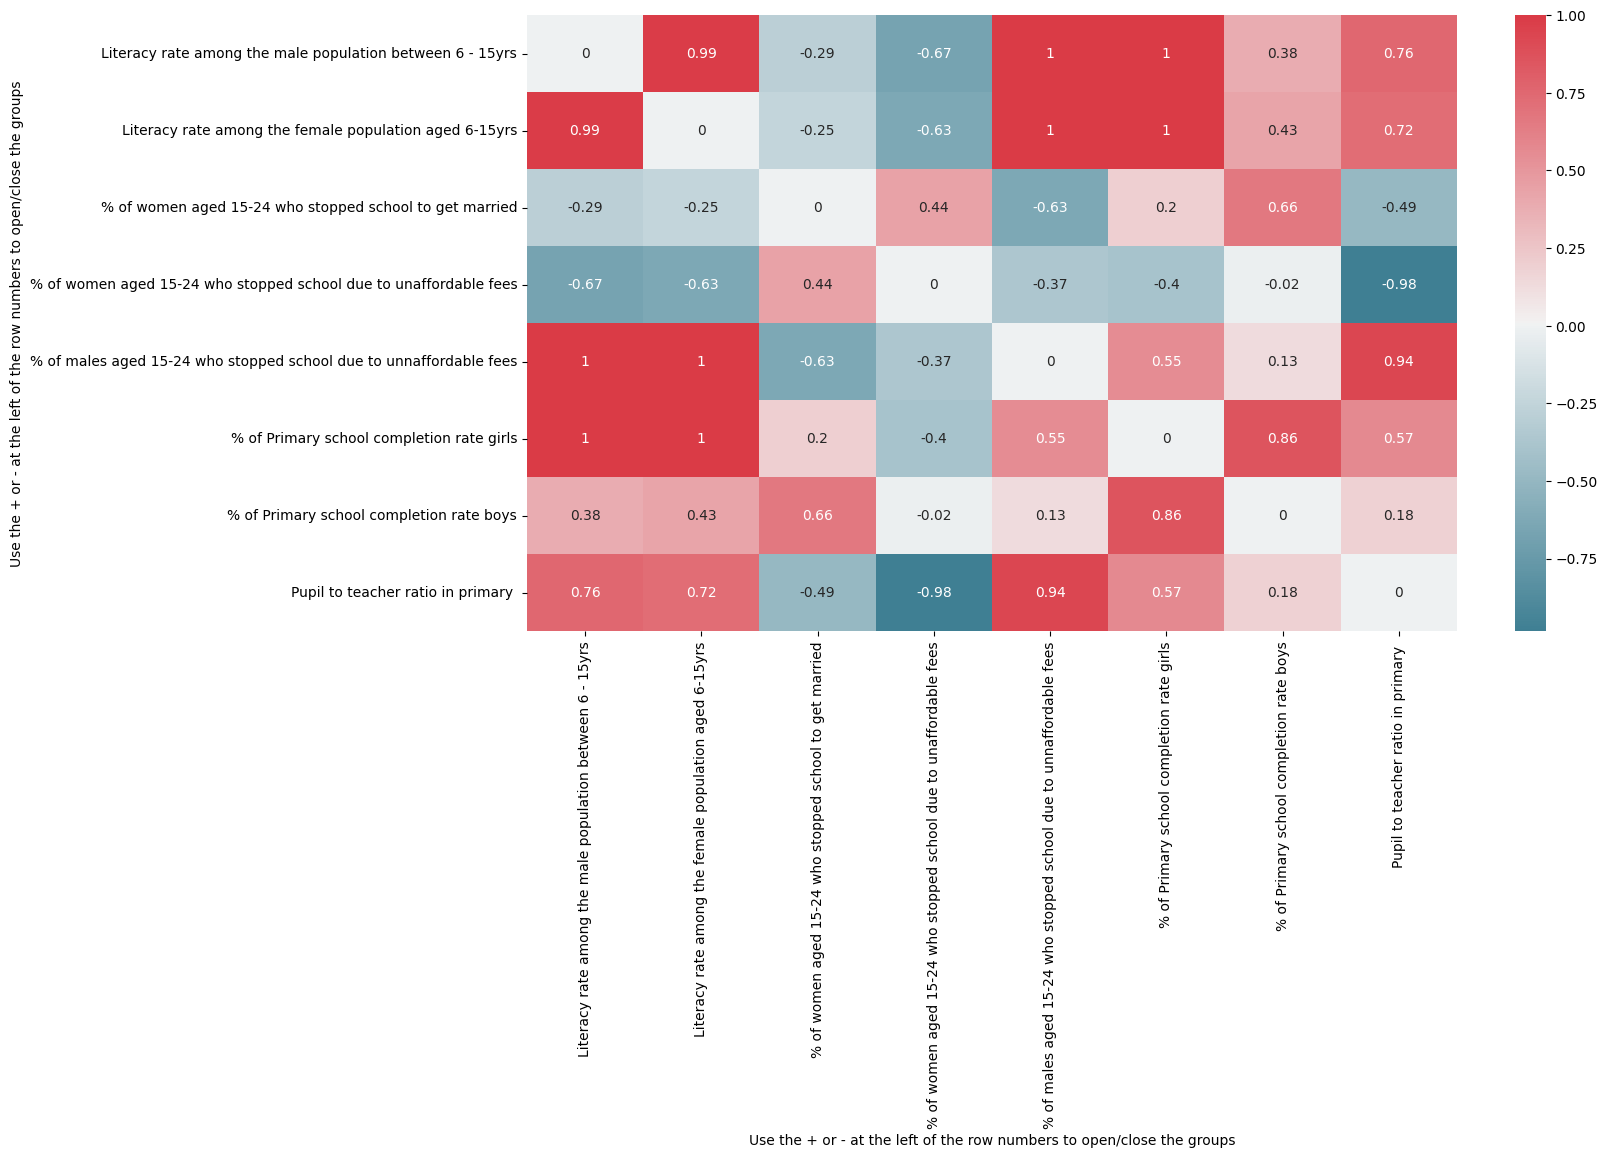

In [27]:
corrmat = aggregate_education[cols].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrmat-np.eye(corrmat.shape[0]), annot = True, cmap = sns.diverging_palette(220, 10, as_cmap=True))
plt.show()